# Real Estate Clean up: updated tile

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# This CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
# Sort the dataframe by price
ds.sort_values(by='price', axis=0, ascending=False, inplace=True)

# Print the address and price from the first row
expensive_address=ds.iloc[0]['address']
expensive_area=ds.iloc[0]['price']
print(f"The house with address {expensive_address} is the most expensive and its price is {expensive_area} USD")

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
# Print the address and price from the last row
cheapest_address=ds.iloc[-1]['address']
cheapest_area=ds.iloc[-1]['price']
print(f"The house with address {cheapest_address} is the least expensive and its price is {cheapest_area} USD")

The house with address Parla is the least expensive and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [5]:
# Sort the dataframe by surface
ds.sort_values(by='surface', axis=0, ascending=False, inplace=True)

# Print the address and surface from the first row
largest_address=ds.iloc[0]['address']
largest_area=ds.iloc[0]['surface']
print(f"The biggest house is located in {largest_address} and it's area is {largest_area} square meters")

# Print the address and surface from the last row
smallest_addres=ds[ds['surface'].notna()].iloc[-1]['address']
smallest_area=ds[ds['surface'].notna()].iloc[-1]['surface']
print(f"The smallest house is located in {smallest_addres} and it's area is {smallest_area} square meters")

The biggest house is located in Sevilla la Nueva and it's area is 249000.0 square meters
The smallest house is located in Calle Amparo,  Madrid Capital and it's area is 15.0 square meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
unique_populations=ds['level5'].unique()
print(f'The dataset contains {len(unique_populations)} unique populations:')
print(unique_populations)

The dataset contains 168 unique populations:
['Sevilla la Nueva' 'Arroyomolinos (Madrid)' 'San Agustín del Guadalix'
 'Navarredonda' 'Galapagar' 'Cabanillas de la Sierra' 'El Molar (Madrid)'
 'Miraflores de la Sierra' 'Alcobendas' ' Madrid Capital'
 'Cubas de la Sagra' 'El Escorial' 'San Sebastián de los Reyes' 'Parla'
 'Las Rozas de Madrid' 'Pozuelo de Alarcón' 'Algete' 'Carabaña'
 'Boadilla del Monte' 'Manzanares El Real' 'Valdemorillo' 'Navalafuente'
 'Torrelodones' 'Tielmes' 'Villaviciosa de Odón' 'Nuevo Baztán'
 'Colmenar de Oreja' 'Camarma de Esteruelas' 'Collado Villalba'
 'Villanueva de la Cañada' 'Hoyo de Manzanares' 'Guadarrama'
 'San Martín de la Vega' 'Villalbilla' 'Colmenar Viejo' 'El Álamo'
 'Alcorcón' 'Pozuelo del Rey' 'Griñón' 'Colmenarejo'
 'Cadalso de los Vidrios' 'Paracuellos de Jarama' 'Morata de Tajuña'
 'Los Molinos' 'Valdetorres de Jarama' 'Getafe' 'Meco'
 'El Boalo - Cerceda – Mataelpino' 'Rivas-vaciamadrid' 'Villa del Prado'
 'Villanueva del Pardillo' 'Majadaho

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [7]:
data_has_null=ds.isnull().values.any()
null_columns=ds.isnull().values.any()
null_rows=ds[ds.isnull().any(axis=1)]


print(f'Data contains null values: {data_has_null}')
print(f'Columns containing null values: {null_columns}')
print('Rows containing null values:')
null_rows.head()

Data contains null values: True
Columns containing null values: True
Rows containing null values:


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
6794,6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,...,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN
12676,12677,153942565,False,montse,NaN,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,3.0,66666.0,389000,...,0,0,0,0,0,1,"40,27977","-3,92413",NaN,NaN
14852,14853,152249752,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/la...,NaN,NaN,16853.0,90000,...,0,0,0,0,0,0,"40,6912092","-3,608836",NaN,NaN
8537,8538,142907825,False,remax jumbo,910758029.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,30.0,20.0,5504.0,790000,...,0,0,0,0,0,0,"40,98879","-3,70811",NaN,NaN
1198,1199,142601805,False,sosdivar,914890914.0,https://www.fotocasa.es/es/comprar/vivienda/la...,6.0,3.0,5083.0,825000,...,0,0,0,0,0,1,"40,55249","-3,98827",NaN,NaN


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [8]:
print('Original dataframe:\n')
ds.info()

Original dataframe:

<class 'pandas.core.frame.DataFrame'>
Index: 15335 entries, 6794 to 12034
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            153

In [9]:
print('Dataframe with null containing rows removed:\n')

# First, drop 'zipCode' and 'customZone', since those columns contain all null values
ds.drop(['zipCode', 'customZone'], axis=1, inplace=True)

# Level 4, 7 & 8 features also have a lot of null values, drop them as well
# otherwise we will have no data left when we drop rows that contain any nulls
ds.drop(['level4', 'level6', 'level8'], axis=1, inplace=True)

ds.dropna(inplace=True)
ds.info()

Dataframe with null containing rows removed:

<class 'pandas.core.frame.DataFrame'>
Index: 11025 entries, 1198 to 498
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11025 non-null  int64  
 1   id_realEstates    11025 non-null  int64  
 2   isNew             11025 non-null  bool   
 3   realEstate_name   11025 non-null  object 
 4   phone_realEstate  11025 non-null  float64
 5   url_inmueble      11025 non-null  object 
 6   rooms             11025 non-null  float64
 7   bathrooms         11025 non-null  float64
 8   surface           11025 non-null  float64
 9   price             11025 non-null  int64  
 10  date              11025 non-null  object 
 11  description       11025 non-null  object 
 12  address           11025 non-null  object 
 13  country           11025 non-null  object 
 14  level1            11025 non-null  object 
 15  level2            11025 non-null  object 
 16

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [10]:
population='Arroyomolinos (Madrid)'

# Get the data for level5="Arroyomolinos (Madrid)"
subset_df=ds[ds['level5'] == population]

# Get the mean of price
price_mean=subset_df['price'].mean()

# Print the result
print(f'Average price in {population} is ${price_mean:.2f}')

Average price in Arroyomolinos (Madrid) is $298780.22


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

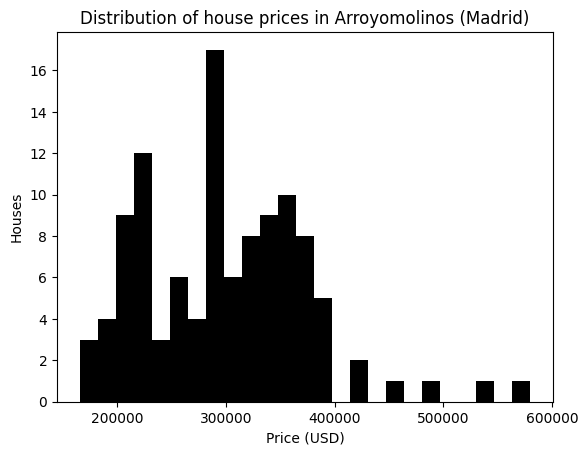

In [11]:
import matplotlib.pyplot as plt

plt.title(f'Distribution of house prices in {population}')
plt.hist(subset_df['price'], bins=25, color='black')
plt.xlabel('Price (USD)')
plt.ylabel('Houses')
plt.show()

The distribution of house prices in Arroyomolinos (Madrid) is jagged with a tail toward higher values. The mean is around 300,000 USD, where there is a large, sharp peak in the number of houses. There are smaller peaks in the house price at around 220,000 USD and 350,000 USD. Most of the houses cost less than 400,000 USD. But there are a few that cost more than that, as much as almost 600,000 USD.

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [12]:
from scipy.stats import ttest_ind

# Get the data for both populations
valdemorillo_df=ds[ds['level5'] == 'Valdemorillo']
galapagar_df=ds[ds['level5'] == 'Galapagar']

# Print the mean for both
print(f"Valdemorillo price mean: ${valdemorillo_df['price'].mean():.2f}")
print(f"Galapagar price mean: ${galapagar_df['price'].mean():.2f}")

# Conduct a t-test on the prices
t_statistic, p_value = ttest_ind(valdemorillo_df['price'], galapagar_df['price'])
print('\np-value:', p_value)

Valdemorillo price mean: $384269.57
Galapagar price mean: $381106.70

p-value: 0.9335268967311312


The p-value for the difference in means does not meet the significance level of <= 0.05. Therefore we accept the null hypothesis that the means are not different.

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [13]:
# Get the data for both populations
valdemorillo_df=ds[ds['level5'] == 'Valdemorillo'].copy()
galapagar_df=ds[ds['level5'] == 'Galapagar'].copy()

# Add the price/m2 column to both
valdemorillo_df['price/m2']=valdemorillo_df['price']/valdemorillo_df['surface']
galapagar_df['price/m2']=galapagar_df['price']/galapagar_df['surface']

# Print the mean for both
print(f"Valdemorillo mean: {valdemorillo_df['price/m2'].mean():.2f} USD per square meter")
print(f"Galapagar mean: {galapagar_df['price/m2'].mean():.2f} USD per square meter")

# Conduct a t-test on the prices
t_statistic, p_value = ttest_ind(valdemorillo_df['price/m2'], galapagar_df['price/m2'])
print('\np-value:', p_value)

Valdemorillo mean: 1321.77 USD per square meter
Galapagar mean: 1566.52 USD per square meter

p-value: 0.010206178702750068


The p-value for the difference in means is < 0.05 so we reject the null hypothesis that the means are not different and conclude that the mean price per square meter is different in Valdemorillo compared to Galapagar.

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

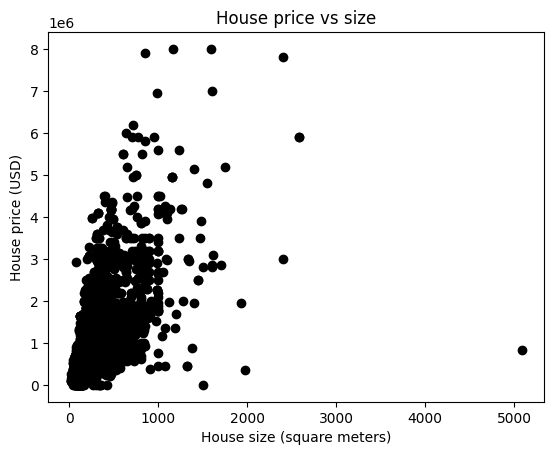

In [14]:
plt.title('House price vs size')
plt.scatter(ds['surface'], ds['price'], color='black')
plt.xlabel('House size (square meters)')
plt.ylabel('House price (USD)')
plt.show()


The price of a house is positivly correlated with it's size whith larger houses costing more. However, this correlation is not absolute, there are plenty of examples where a smaller house costs more than a larger house and vice versa. There is also one extreem value, where a ~5000 square meter house (the largest in the datasedt) has a relativly low price.

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [15]:
print(f"Data set contains {len(ds['realEstate_name'].unique())} different real estate agencies.")

Data set contains 1337 different real estate agencies.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [16]:
ds['level5'].value_counts()

level5
 Madrid Capital               5658
Alcalá de Henares              474
Las Rozas de Madrid            360
Móstoles                       259
Parla                          248
Alcobendas                     243
Boadilla del Monte             242
Getafe                         220
Torrejón de Ardoz              216
Pozuelo de Alarcón             207
Valdemoro                      201
Fuenlabrada                    182
Collado Villalba               179
Leganés                        173
Alcorcón                       154
Villaviciosa de Odón           143
Coslada                        140
San Sebastián de los Reyes     136
Majadahonda                    133
Arganda del Rey                130
Aranjuez                       127
Pinto                          126
Arroyomolinos (Madrid)         110
Rivas-vaciamadrid              107
Navalcarnero                    84
Torrelodones                    78
San Lorenzo de El Escorial      75
El Escorial                     74
Moralzarzal  

#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [17]:
south_belt_populations=["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

subset_df=ds[ds['level5'].isin(south_belt_populations)].copy()

# Remove rows that have zero for price or area (we are going to work with these features a lot in the next few questions)
subset_df=subset_df[subset_df['price'] != 0]
subset_df=subset_df[subset_df['surface'] != 0]
subset_df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
5585,5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,...,0,0,0,0,0,0,0,0,"40,3535169","-3,8664683"
4900,4901,153473131,False,mr house,911369017.0,https://www.fotocasa.es/es/comprar/vivienda/me...,5.0,5.0,600.0,759500,...,0,0,0,0,0,0,0,0,"40,3076893328","-3,7335333825"
2881,2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,...,0,0,0,0,0,0,0,0,"40,302820239187","-3,7281704612835"
12204,12205,153884081,False,cr homes,914890664.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,450.0,775000,...,0,0,0,0,0,0,0,0,"40,3218194","-3,7116497"
10412,10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,...,0,0,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027"


In [18]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 5585 to 10217
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        718 non-null    int64  
 1   id_realEstates    718 non-null    int64  
 2   isNew             718 non-null    bool   
 3   realEstate_name   718 non-null    object 
 4   phone_realEstate  718 non-null    float64
 5   url_inmueble      718 non-null    object 
 6   rooms             718 non-null    float64
 7   bathrooms         718 non-null    float64
 8   surface           718 non-null    float64
 9   price             718 non-null    int64  
 10  date              718 non-null    object 
 11  description       718 non-null    object 
 12  address           718 non-null    object 
 13  country           718 non-null    object 
 14  level1            718 non-null    object 
 15  level2            718 non-null    object 
 16  level3            718 non-null    object 
 1

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

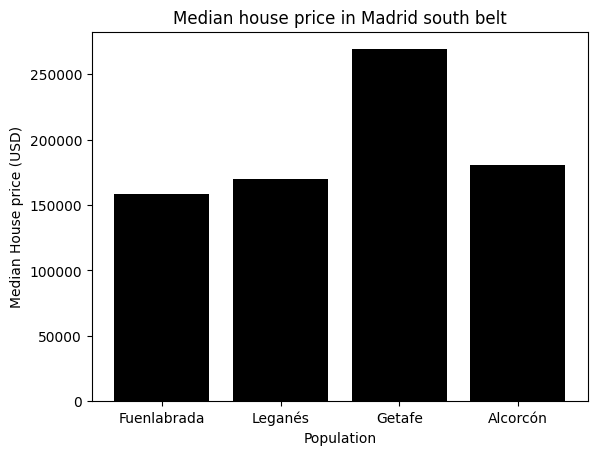

In [19]:
medians=subset_df.groupby('level5')[['price']].median()

plt.title('Median house price in Madrid south belt')

for i, population in enumerate(south_belt_populations):

    plt.bar(i,medians.loc[population].values[0], color="black")

plt.xlabel('Population')
plt.ylabel('Median House price (USD)')
plt.xticks(range(len(south_belt_populations)), south_belt_populations)
plt.show()

Getafe has the highest median home price at about 250,000 USD. The other three populations are approximatly 100,000 USD less with median prices around 150,000 USD.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [47]:
independent_vars=['price', 'rooms', 'surface', 'bathrooms']

In [55]:
print(f'Means:\n{subset_df[independent_vars].mean()}')

price        223970.158774
rooms             3.009749
surface         109.855153
bathrooms         1.610028
dtype: float64

In [49]:
print(f'Varances:\n{subset_df[independent_vars].var()}')

Varances:
price        1.477065e+10
rooms        7.125966e-01
surface      4.271081e+03
bathrooms    5.617961e-01
dtype: float64


In [62]:
column_names=['price', 'surface']

#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [21]:
subset_df.loc[subset_df.groupby('level5')['price'].idxmax()]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
5585,5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,...,0,0,0,0,0,0,0,0,"40,3535169","-3,8664683"
11561,11562,153660921,False,unna madrid,912780846.0,https://www.fotocasa.es/es/comprar/vivienda/va...,4.0,3.0,274.0,490000,...,0,0,0,0,0,0,0,1,"40,28286","-3,81475"
2881,2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,...,0,0,0,0,0,0,0,0,"40,302820239187","-3,7281704612835"
10412,10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,...,0,0,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027"


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

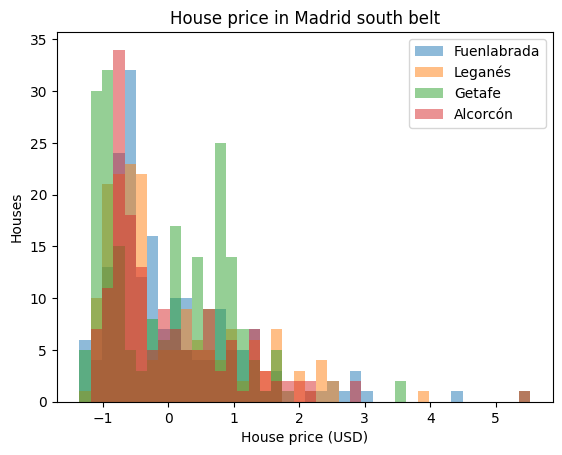

In [22]:
import numpy as np

# Normalize the housing prices
normalized_prices=[]

for population in south_belt_populations:
    prices=subset_df['price'][subset_df['level5'] == population]
    normalized_prices.append((prices - prices.mean()) / prices.std())

# Calcuate common bins for all populations
bins=np.histogram(np.hstack(normalized_prices), bins=40)[1]

# Draw the plot
plt.title('House price in Madrid south belt')

for population, prices in zip(south_belt_populations, normalized_prices):

    plt.hist(prices, bins=bins, label=population, alpha=0.5)

plt.xlabel('House price (USD)')
plt.ylabel('Houses')
plt.legend(loc='upper right')
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

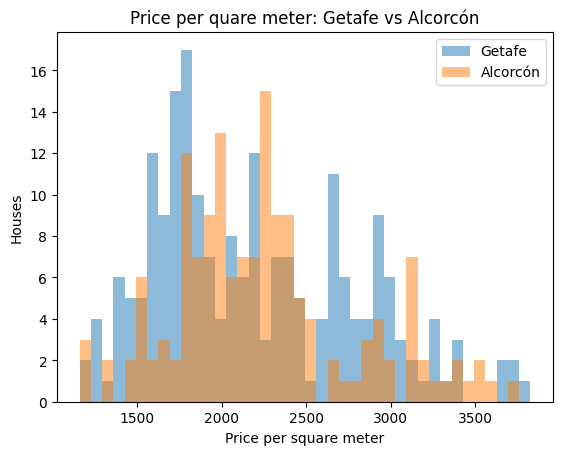

In [23]:
subset_df['pps']=subset_df['price'] / subset_df['surface']

# Calcuate common bins for all populations
bins=np.histogram(np.hstack((
    subset_df['pps'][subset_df['level5'] == 'Getafe'],
    subset_df['pps'][subset_df['level5'] == 'Alcorcón']
)), bins=40)[1]

# Draw the plot
plt.title('Price per quare meter: Getafe vs Alcorcón')
plt.hist(subset_df['pps'][subset_df['level5'] == 'Getafe'], bins=bins, label='Getafe', alpha=0.5)
plt.hist(subset_df['pps'][subset_df['level5'] == 'Alcorcón'], bins=bins, label='Alcorcón', alpha=0.5)

plt.xlabel('Price per square meter')
plt.ylabel('Houses')
plt.legend(loc='upper right')
plt.show()

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

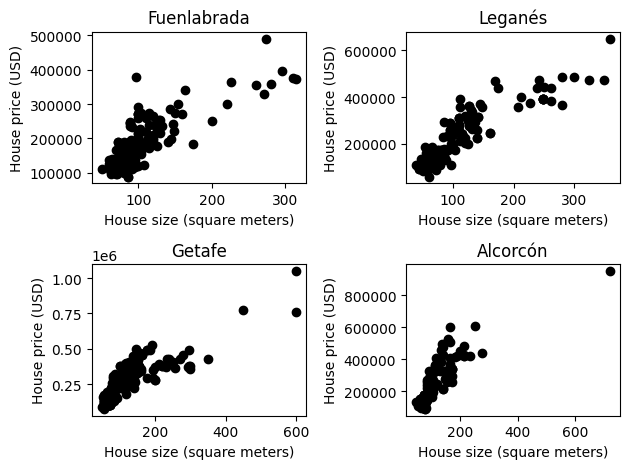

In [24]:
fig, axs = plt.subplots(2, 2)
axs=axs.flatten()

for ax, population in zip(axs, south_belt_populations):
    ax.scatter(
        subset_df['surface'][subset_df['level5'] == population],
        subset_df['price'][subset_df['level5'] == population],
        color='black'
    )
    ax.set_title(population)
    ax.set_xlabel('House size (square meters)')
    ax.set_ylabel('House price (USD)')

plt.tight_layout()

In [25]:
subset_df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps
5585,5586,153275915,False,100 home red inmobiliaria,912669623.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,6.0,6.0,722.0,950000,...,0,0,0,0,0,0,0,"40,3535169","-3,8664683",1315.789474
4900,4901,153473131,False,mr house,911369017.0,https://www.fotocasa.es/es/comprar/vivienda/me...,5.0,5.0,600.0,759500,...,0,0,0,0,0,0,0,"40,3076893328","-3,7335333825",1265.833333
2881,2882,151105544,False,unna grupo inmobiliario,912665694.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,600.0,1050000,...,0,0,0,0,0,0,0,"40,302820239187","-3,7281704612835",1750.000000
12204,12205,153884081,False,cr homes,914890664.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,4.0,450.0,775000,...,0,0,0,0,0,0,0,"40,3218194","-3,7116497",1722.222222
10412,10413,152251506,False,bafre gestion y servicios inmobiliarios,910752245.0,https://www.fotocasa.es/es/comprar/vivienda/co...,6.0,5.0,360.0,650000,...,0,0,0,0,0,0,0,"40,3423636291504","-3,74814414978027",1805.555556


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

**Note:** Stamen layers no longer work. See here: https://github.com/geopandas/geopandas/issues/3065

In [26]:
from ipyleaflet import Map, Marker, AwesomeIcon, basemaps#, basemap_to_tiles
from ipywidgets import Layout

# Set the map to load centered on the south west part of Madrid
center=[40.35, -3.8]
zoom=11.5

# Create the map object
map=Map(
    basemap=basemaps.OpenStreetMap.Mapnik,
    center=center,
    zoom=zoom,
    layout=Layout(height='600px')
)

# Add map markers for each property in the dataset using a
# different color for each population area
colors=['black', 'blue', 'green', 'red']

for population, color in zip(south_belt_populations, colors):

    icon=AwesomeIcon(
        name='home',
        marker_color=color,
        icon_color='white',
        spin=False
    )

    population_df=subset_df[subset_df['level5'] == population]

    for i, row in population_df.iterrows():

        lat=float(row['latitude'].replace(',', '.'))
        lon=float(row['longitude'].replace(',', '.'))

        map.add(Marker(icon=icon, location=(lat, lon)))

# Show the map
map


Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…